In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np
import seaborn as sns

import scipy as sc
from tabulate import tabulate
from scipy.stats import cumfreq, relfreq, norm, linregress, mode
#from sympy.stats import variance, Die, Normal, Binomial, FiniteRV, density, P, E, Normal



init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'autoev_est_prob'
titulo = 'Autoevaluación de Estadística y Probabilidad'
curso = '1BC'

from sympy.stats import variance, Die, Normal, Binomial, FiniteRV, density, P, E, Normal

x,y = symbols('x, y', real=True)

%matplotlib inline


IPython console for SymPy 1.2 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
def analisis_discreto(texto_ejercicio, str_datos, n_ejercicio='_'):
    texto_ejercicio = texto_ejercicio + str_datos
    enunciado_latex = [r'Realiza una tabla de frecuencias',
                   r'Realiza un diagrama de barras',
                   r'Calcular los parámetros de centralización',
                   r'Calcular los parámetros de posición P70, Q1, Q3, D4',
                   r'Calcular los parámetros de dispersión'
                ]
    enunciado, solucion = [], []
    enunciado = enunciado_latex

    datos = np.loadtxt(str_datos.split())
    datos = datos.astype(int)
    #x_i, f_i, F_i, r_i  = np.unique(datos),np.bincount(datos), cumfreq(datos, numbins=len(np.unique(datos)))[0].astype(int), np.multiply(relfreq(datos, numbins=len(np.unique(datos)))[0],100)
    tabla = pd.DataFrame({'x_i':np.unique(datos), 'f_i':np.unique(datos, return_counts=True)[1], 'F_i':np.unique(datos, return_counts=True)[1].cumsum(), 'h_i':np.unique(datos, return_counts=True)[1]/len(datos), 'H_i':(np.unique(datos, return_counts=True)[1]/len(datos)).cumsum(), '%_i':np.unique(datos, return_counts=True)[1]*100/len(datos), '%A_i':(np.unique(datos, return_counts=True)[1]*100/len(datos)).cumsum()}).set_index('x_i')
    solucion.append(r"\\"+tabulate(tabla, headers="keys", tablefmt="latex"))

    d = np.diff(np.unique(datos)).min()
    left_of_first_bin = datos.min() - float(d)/2
    right_of_last_bin = datos.max() + float(d)/2
    plt.clf()
    plt.hist(datos, np.arange(left_of_first_bin, right_of_last_bin + d, d), rwidth=0.9, cumulative = False)
    plt.title("Diagrama "+n_ejercicio)
    plt.savefig("../img/"+n_ejercicio)

    solucion.append(r"\\ \resizebox{0.8\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % n_ejercicio)
    
    solucion.append({"media":datos.mean(), "mediana":np.percentile(datos,50), "moda":mode(datos)})
    solucion.append({"P70":np.percentile(datos,70), "Q1":np.percentile(datos,25),"Q3":np.percentile(datos,75),"D4":np.percentile(datos,40),})
    solucion.append({"rango":np.amax(datos)-np.amin(datos), "varianza": np.var(datos), "desviación típica":sqrt(np.var(datos)), "coeficiente variación": sqrt(np.var(datos))/abs(np.mean(datos))})
    display(tabla, solucion[2] , solucion[3], solucion[4])
    return  texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio


def datos_cualitativa(lista):
    # Devuelve un diccionario para crear la probabilidad cuantitativa a partir del índice
    nplista = np.array(lista)
    total = nplista[:,1].astype(int).sum()
    lista_val = list(nplista[:,0])
    dic ={i:nplista[i,1].astype(int)/total for i,s in enumerate(nplista)}
    
    return dic,lista_val    

def extracciones(datos, remplazamiento=False) :
    #Devuelve diccionarios con las extracciones del primer conjunto
    diccionarios = []

    if remplazamiento is True : 
        extraccion = 0
    else :
        extraccion = 1


    diccionarios.append(datos_cualitativa(datos))

    for i in range(len(datos)):
        npdatos = np.array(datos)
        npdatos[i,1]=npdatos[i,1].astype(int) - extraccion
        diccionarios.append(datos_cualitativa(list(npdatos)))
        
    return diccionarios




,f_i,F_i,h_i,H_i,%_i,%A_i
x_i,,,,,,
2,1,1,0.1,0.1,10.0,10.0
3,2,3,0.2,0.3,20.0,30.0
4,3,6,0.3,0.6,30.0,60.0
5,3,9,0.3,0.9,30.0,90.0
8,1,10,0.1,1.0,10.0,100.0


{'media': 4.3,
 'mediana': 4.0,
 'moda': ModeResult(mode=array([4]), count=array([3]))}

{'P70': 5.0, 'Q1': 3.25, 'Q3': 5.0, 'D4': 4.0}

{'rango': 6,
 'varianza': 2.41,
 'desviación típica': 1.55241746962600,
 'coeficiente variación': 0.361027318517675}

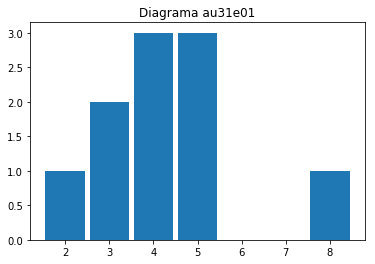

In [3]:
df_ejercicios = pd.DataFrame()

lista_problemas = [
                  #['pe01',"""Se realiza una encuesta a un grupo de 20 personas acerca del número de hermanos que tienen, obteniéndose los siguientes resultados:"""
                  # ,r"0 1 2 3 5 2 0 1 1 1 2 2 1 0 0 0 0 1 2 3"],

                    ['au31e01',"""Se realiza una encuesta a un grupo de 10 personas acerca del número de veces que acuden a la peluquería a lo largo de un año, obteniéndose los siguientes resultados:"""
                   ,r" 3 5 5 2 3 4 5 8 4 4 "]
                
                                    ]
for i,p in enumerate(lista_problemas):
    texto_ejercicio, enunciado_latex, enunciado, solucion, tabla, n_ejercicio = analisis_discreto(texto_ejercicio=p[1], str_datos=p[2], n_ejercicio=p[0])
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=False, sol_tex=False), ignore_index=True)



In [4]:
# Página 90 ejercicio 7

texto_ejercicio = r"""En una consulta médica la distribución de pacientes por su edad ha sido, en la última semana, la siguiente:"""



n_ejercicio = 'au31e02'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[0,30,10],[30,60,20],[60,90,25],[90,120,3]])
tabla_enunciado = pd.DataFrame(list(zip([r"$"+latex(Interval.Ropen(k[0],k[1]))+"$" for k in datos[:,0:2]],datos[:,2])), columns=['Duración','Cantidad'])
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

marca = (datos[:,1]+datos[:,0])/2
marca = marca.reshape(-1,1)
datos = np.concatenate((datos, marca), axis=1)[:,[0,1,3,2]]
tabla = pd.DataFrame({r'lim_inf': datos[:,0],'lim_sup': datos[:,1],
                      'x_i': datos[:,2],'f_i':datos[:,3],'F_i':datos[:,3].cumsum(),
                     'h_i': datos[:,3]/datos[:,3].sum(), 'H_i':(datos[:,3]/datos[:,3].sum()).cumsum(),
                     'x_if_i': datos[:,2]*datos[:,3], 'x^2_if_i': datos[:,2]**2*datos[:,3]})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[np.nan,np.nan,np.nan,tabla.f_i.sum(),
                         np.nan, tabla.h_i.sum(), np.nan,
                        tabla.x_if_i.sum(),tabla['x^2_if_i'].sum()]],columns=list(tabla.columns))

tabla.append(totales,ignore_index=True)


enunciado_latex.append("Haz una tabla de frecuencias")
enunciado.append("Haz una tabla de frecuencias")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

enunciado_latex.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")
enunciado.append("Calcula media, la varianza, la desviación típica y el coeficiente de variación")

media = (totales['x_if_i']/totales['f_i'])[0]
media

var = (totales['x^2_if_i']/totales['f_i']-media**2)[0]

desv_tip = sqrt(var)

{'media':media, 'varianza': var, 'desviación típica': desv_tip}
solucion.append({'media':media, 'varianza': var, 'desviación típica': desv_tip
                , 'coeficiente de variación': desv_tip/abs(media)})

# pregunta 3

enunciado_latex.append("La edad más frecuente de los pacientes")
enunciado.append("La edad más frecuente de los pacientes")


fila_moda = tabla.loc[tabla.f_i==tabla.f_i.max()]
ind = fila_moda.index[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    f0 = 0
else:
    f0 = tabla.iloc[ind-1].f_i
    
if ind == max(tabla.index) :
    f2 = f0
else:
    f2 = tabla.iloc[ind+1].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

moda = L + C*(f-f0)/((f-f0)+(f-f2))

print(moda)

solucion.append({'Intervalo modal':r"$"+latex(Interval.Ropen(fila_moda.lim_inf,fila_moda.lim_sup))+"$" ,'moda': moda})
#solucion.append(r"$"+latex(Interval.Ropen(fila_moda.lim_inf,fila_moda.lim_sup))+r"$")

# pregunta 4

enunciado_latex.append("El percentil 47")
enunciado.append("El percentil 47")

perc = 47
ind = tabla.loc[tabla.H_i<=perc/100].iloc[-1:].index[0] + 1

k = perc
N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'k':k, 'N': N, 'L_i': L, 'f_i': f, 'F_{i-1}':F, 'C_i':C})

percentil = L + C*(k*(N/100)-F)/f

solucion.append({r'k':k, r'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'percentil':percentil})

#pregunta 4

enunciado_latex.append("¿Qué porcentaje de pacientes tenían una edad superior a 60 años?")
enunciado.append("¿Qué porcentaje de pacientes tenían una edad superior a 60 años?")

valor = 60
ind = tabla.loc[tabla.lim_inf<=valor].iloc[-1:].index[0]

if ind == 0 :
    F = 0
else:
    F = tabla.iloc[ind-1].F_i

N = totales.f_i[0]
L = tabla.iloc[ind].lim_inf
f = tabla.iloc[ind].f_i
C = tabla.iloc[ind].lim_sup - tabla.iloc[ind].lim_inf

print({'valor':valor, 'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'Porcentaje':solve(Eq(valor,L+C*(x*N/100-F)/f))[0]})

print(solve(Eq(valor,L+C*(x*N/100-F)/f))[0])


solucion.append({'valor':valor, 'N': N, r'$L_i$': L, r'$f_i$': f, r'$F_{i-1}$':F, r'$C_i$':C, 'Porcentaje':solve(Eq(valor,L+C*(x*N/100-F)/f))[0]})


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**En una consulta médica la distribución de pacientes por su edad ha sido, en la última semana, la siguiente:\\\begin{tabular}{rlr}
\hline
    & Duración               &   Cantidad \\
\hline
  0 & $\left[0, 30\right)$   &         10 \\
  1 & $\left[30, 60\right)$  &         20 \\
  2 & $\left[60, 90\right)$  &         25 \\
  3 & $\left[90, 120\right)$ &          3 \\
\hline
\end{tabular}**

65.55555555555556
{'k': 47, 'N': 58.0, 'L_i': 30.0, 'f_i': 20.0, 'F_{i-1}': 10.0, 'C_i': 30.0}
{'valor': 60, 'N': 58.0, '$L_i$': 60.0, '$f_i$': 25.0, '$F_{i-1}$': 30.0, '$C_i$': 30.0, 'Porcentaje': 51.7241379310345}
51.7241379310345


**La temperatura media en los meses de invierno en varias ciudades y el gasto medio por habitante en
calefacción ha sido:\\\begin{tabular}{lrrrr}
\hline
                      &   0 &   1 &   2 &   3 \\
\hline
 Temperatura (grados) &  10 &  14 &  17 &  20 \\
 Gasto (euros)        & 150 & 102 &  55 &  18 \\
\hline
\end{tabular}**

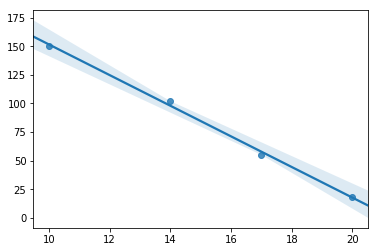

In [5]:
# Página 93 ejercicio 5

texto_ejercicio = r"""La temperatura media en los meses de invierno en varias ciudades y el gasto medio por habitante en
calefacción ha sido:"""


n_ejercicio = 'au31e03'
enunciado_latex, enunciado, solucion = [],[],[]

datos = np.array([[10  , 150 ],
       [14 , 102],
       [17  , 55],
       [20  , 18],
       ])





tabla_enunciado = pd.DataFrame({'Temperatura (grados)':datos[:,0],'Gasto (euros)':datos[:,1]}).T
tabla_enunciado_latex = tabulate(tabla_enunciado, headers="keys", tablefmt="latex").replace('\\$','$').replace('textbackslash{}','')
texto_ejercicio = texto_ejercicio + r'\\'+ tabla_enunciado_latex

display(md("**"+texto_ejercicio+"**"))

## Manipulación de datos 


tabla = pd.DataFrame({r'x': datos[:,0],'y': datos[:,1],
                      'xy': datos[:,0]*datos[:,1],'x2':datos[:,0]**2,'y2':datos[:,1]**2})
tabla

#totales = np.array([np.nan,np.nan,np.nan,tabla.f_i.sum(),tabla.F_i.sum()])
totales = pd.DataFrame([[tabla.x.sum(),tabla.y.sum(),tabla.xy.sum(),tabla.x2.sum(),
                         tabla.y2.sum()]],columns=list(tabla.columns))
totales

medias = pd.DataFrame([[tabla.x.mean(),tabla.y.mean(),tabla.xy.mean(),tabla.x2.mean(),
                         tabla.y2.mean()]],columns=list(tabla.columns))
medias

tabla_agregada =tabla.append(totales,ignore_index=True).append(medias,ignore_index=True)

tabla_agregada


# pregunta 1
enunciado_latex.append("Haz una tabla de frecuencias con los datos que necesites para hace el resto de apartados")
enunciado.append("Haz una tabla de frecuencias con los datos que necesites para hace el resto de apartados")
solucion.append(tabulate(tabla.append(totales,ignore_index=True), headers="keys", tablefmt="latex"))

# pregunta 2

enunciado_latex.append("Calcula el gasto medio")
enunciado.append("Calcula el gasto medio")

media = np.mean(datos[:,1])
media

solucion.append({'media':media})

# pregunta  3

enunciado_latex.append("Halla el coeficiente de correlación lineal e interprétalo")
enunciado.append("Halla el coeficiente de correlación lineal e interprétalo")


pendiente, ordenada, coefcorr = linregress(datos)[:3]

solucion.append({'media de x': np.mean(datos[:,0]),
                 'desviación de x' : np.std(datos[:,0]),
                 'media de y' : np.mean(datos[:,1]),
                 'desviación de y' : np.std(datos[:,1]),                 
                 'covarianza': np.cov(datos[:,0],datos[:,1],bias=True)[0][1],
                 'coeficiente de correlación': coefcorr})

# pregunta  4

valor_a_estimar = 12

enunciado_latex.append("Estima el gasto medio por habitante de una ciudad si la temperatura media hubiera sido {}ºC".format(valor_a_estimar))
enunciado.append("Estima el gasto medio por habitante de una ciudad si la temperatura media hubiera sido {}ºC".format(valor_a_estimar))

f1 = sns.regplot(datos[:,0],datos[:,1]).figure
f1.savefig(str(n_ejercicio)+".pgf")



(pendiente*x+ordenada).subs(x,valor_a_estimar)

solucion.append(r"$"+ latex(Eq(y,pendiente*x+ordenada))+r"$ \\"+
                r"\resizebox {0.5\textwidth}{!}{\input{"+str(n_ejercicio)+r".pgf}}\\"+
                r"La estimación para x=" + latex(valor_a_estimar)+r" es: "+latex((pendiente*x+ordenada).subs(x,valor_a_estimar)))
   

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=False, sol_tex=False), ignore_index=True)


In [6]:
# Página 98 ejercicio 5

n_total,n_1, n_2, n_int = [30,16,24,12]

texto_ejercicio = r"""De los {} alumnos de una clase, {} escogieron francés como idioma y {} inglés. {} eligieron ambos idiomas y
el resto no optó por ninguno de ellos. elegido un alumno al azar, calcula las probabilidades de que escogiera:
""".format(n_total,n_1, n_2, n_int) 

n_ejercicio = 'au31e04'

display(md("**"+texto_ejercicio+"**"))

dic_1, val_1 = datos_cualitativa([['F',n_1],['NF',n_total-n_1]])
dic_2, val_2 = datos_cualitativa([['I',n_2],['NI',n_total-n_2]])

frances = FiniteRV('frances',density=dic_1)
ingles = FiniteRV('ingles',density=dic_2)


enunciado_latex, enunciado, solucion = [],[],[]

en = r"""i) Francés \\ \
ii) Inglés \\ \
iii) Ambos idiomas \\ \
iv) Francés o Inglés \\ \
v) Francés, pero no inglés \\ \
vi) Inglés, pero no francés""" 

enunciado_latex.append(en)
enunciado = str(en)
solucion.append(latex([nsimplify(P(Eq(frances,val_1.index('F')))),
nsimplify(P(Eq(ingles,val_2.index('I')))),
nsimplify(n_int/n_total),
nsimplify(P(Eq(frances,val_1.index('F')))+P(Eq(ingles,val_2.index('I')))-n_int/n_total),
nsimplify(P(Eq(frances,val_1.index('F')))*(n_1-n_int)/n_1),
nsimplify(P(Eq(ingles,val_2.index('I')))*(n_2-n_int)/n_2)]))

display(md(""+ enunciado_latex[0] +" \\rightarrow " + solucion[0] +""))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=False), ignore_index=True)


**De los 30 alumnos de una clase, 16 escogieron francés como idioma y 24 inglés. 12 eligieron ambos idiomas y
el resto no optó por ninguno de ellos. elegido un alumno al azar, calcula las probabilidades de que escogiera:
**

i) Francés \\ ii) Inglés \\ iii) Ambos idiomas \\ iv) Francés o Inglés \\ v) Francés, pero no inglés \\ vi) Inglés, pero no francés \rightarrow \left [ \frac{8}{15}, \quad \frac{4}{5}, \quad \frac{2}{5}, \quad \frac{14}{15}, \quad \frac{2}{15}, \quad \frac{2}{5}\right ]

In [7]:
datos = [['N',8],['B',14]]


texto_ejercicio = r"""Se tiene una urna con {} bolas negras y {} blancas, y se realizan dos extracciones 
sucesivas de una bola. 
Halla la probabilidad de que las dos bolas sean blancas en los siguientes casos:""".format(datos[0][1], datos[1][1]) 

n_ejercicio = 'au31e05'

display(md("**"+texto_ejercicio+"**"))

# vectores iniciales correspondientes al texto del enunciado

enunciado_latex, enunciado, solucion = [],[],[]

en = r"""i) Con devolución a la urna de la primera bola extraída ii) Sin devolución
""" 

enunciado_latex.append(en)
enunciado = str(en)


dic_0, val_0 = extracciones(datos, remplazamiento=True)[0]
dic_1, val_1 = extracciones(datos, remplazamiento=True)[1]
dic_2, val_2 = extracciones(datos, remplazamiento=True)[2]

ini = FiniteRV('ini',density=dic_0)
si_1 = FiniteRV('si_1',density=dic_1)
si_2 = FiniteRV('si_2',density=dic_2)

p1 = P(Eq(ini, val_0.index('B')))*P(Eq(si_2,val_2.index('B')))

dic_0, val_0 = extracciones(datos)[0]
dic_1, val_1 = extracciones(datos)[1]
dic_2, val_2 = extracciones(datos)[2]

ini = FiniteRV('ini',density=dic_0)
si_1 = FiniteRV('si_1',density=dic_1)
si_2 = FiniteRV('si_2',density=dic_2)

p2 = P(Eq(ini, val_0.index('B')))*P(Eq(si_2,val_2.index('B')))



solucion.append(
latex([nsimplify(p1),nsimplify(p2)]))

display(md(""+ enunciado_latex[0] +" \\rightarrow " + solucion[0] +""))

display(extracciones(datos))
    

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=False), ignore_index=True)


**Se tiene una urna con 8 bolas negras y 14 blancas, y se realizan dos extracciones 
sucesivas de una bola. 
Halla la probabilidad de que las dos bolas sean blancas en los siguientes casos:**

i) Con devolución a la urna de la primera bola extraída ii) Sin devolución
 \rightarrow \left [ \frac{49}{121}, \quad \frac{13}{33}\right ]

[({0: 0.36363636363636365, 1: 0.6363636363636364}, ['N', 'B']),
 ({0: 0.3333333333333333, 1: 0.6666666666666666}, ['N', 'B']),
 ({0: 0.38095238095238093, 1: 0.6190476190476191}, ['N', 'B'])]

In [8]:
# Página 99 ejercicio 18

# Bayes


pr0=60
pr1=2
pr2=4
datos = [[['A',pr0],['B',100-pr0]],[['D',pr1],['ND',100-pr1]],[['D',pr2],['ND',100-pr2]]]

texto_ejercicio = r"""Dos máquinas se usan para producir marcapasos. La máquina A produce el {}\% de todos los marcapasos.
El {}\% de todos los marcapasos producidos por la máquina A son defectuosos, mientras que el {}\% de los
marcapasos producidos por la máquina B son defectuosos. Se selecciona un marcapasos al azar de entre
todos los producidos
""".format(pr0,pr1,pr2)

n_ejercicio = 'au31e06'

display(md("**"+texto_ejercicio+"**"))

diccionarios = [datos_cualitativa(datos[i]) for i,s  in enumerate(datos)]

ini = FiniteRV('ini',density=diccionarios[0][0])
si_1 = FiniteRV('si_1',density=diccionarios[1][0])
si_2 = FiniteRV('si_2',density=diccionarios[2][0])

enunciado_latex, enunciado, solucion = [],[],[]

en = r"""i) calcular la probabilidad de que sea defectuoso
ii) Si sabemos que el marcapasos es defectuoso, calcula la probabilidad de que haya sido producido por la
máquina A.""" 

enunciado_latex.append(en)
enunciado = str(en)

#P(Eq(frances,val_1.index('F')))

p1 = P(Eq(ini,0))*P(Eq(si_1,0))+P(Eq(ini,1))*P(Eq(si_2,0))
p2 = (P(Eq(ini,0))*P(Eq(si_1,0)))/(P(Eq(ini,0))*P(Eq(si_1,0))+P(Eq(ini,1))*P(Eq(si_2,0)))
solucion.append(latex([nsimplify(p1),
                       nsimplify(p2)
               ]))

display(md(""+ enunciado_latex[0] +" \\rightarrow " + solucion[0] +""))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', enun_tex=False), ignore_index=True)
 

**Dos máquinas se usan para producir marcapasos. La máquina A produce el 60\% de todos los marcapasos.
El 2\% de todos los marcapasos producidos por la máquina A son defectuosos, mientras que el 4\% de los
marcapasos producidos por la máquina B son defectuosos. Se selecciona un marcapasos al azar de entre
todos los producidos
**

i) calcular la probabilidad de que sea defectuoso
ii) Si sabemos que el marcapasos es defectuoso, calcula la probabilidad de que haya sido producido por la
máquina A. \rightarrow \left [ \frac{7}{250}, \quad \frac{3}{7}\right ]

In [9]:
puntuacion = '1'                          
                      
datos = [{1:0.2,2:0.2,3:0.3,4:0.2,5:0.1}]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'au31e07'
    enunciado_latex, enunciado, solucion = [],[],[]
    
    texto_ejercicio = r"""Sea X una variable aleatoria discreta cuya función de probabilidad es ($x_i:p_i$):\\{} 
    """.format(datos[i])
    
    display(md("**"+texto_ejercicio+"**"))
    
    
    enunciado_latex.append(r"Calcula sus parámetros")
    enunciado = str(s)
    densidad = datos[i]
    X = FiniteRV('X',densidad) 
    display(density(X))
        
    sol = r"\\La media es: $"
    sol+=latex(E(X))+r"$ \\" + r"La varianza: $" + latex(variance(X))+r"$"
    solucion.append(sol)
    display(md(enunciado_latex[0] +" $ \\rightarrow $" + solucion[0] ))
    
    enunciado_latex.append(r"Calcula $P\left(X < 4.5\right)$: , $P\left( X \geqslant 3 \right)$, $P\left(2\leqslant X < 4 \right)$ ")
    enunciado = str(s)
    densidad = datos[i]
    X = FiniteRV('X',densidad) 
    display(density(X))
        
    sol = r" $"
    sol+=latex([P(X<4.5), P(X>=3), P(And(2<=X, X<4))])+r"$"
    solucion.append(sol)
    display(md(enunciado_latex[1] +" $ \\rightarrow $" + solucion[1] ))
    
   
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**Sea X una variable aleatoria discreta cuya función de probabilidad es ($x_i:p_i$):\\{1: 0.2, 2: 0.2, 3: 0.3, 4: 0.2, 5: 0.1} 
    **

Calcula sus parámetros $ \rightarrow $\\La media es: $2.8$ \\La varianza: $1.56$

Calcula $P\left(X < 4.5\right)$: , $P\left( X \geqslant 3 \right)$, $P\left(2\leqslant X < 4 \right)$  $ \rightarrow $ $\left [ 0.9, \quad 0.6, \quad 0.5\right ]$

In [10]:
puntuacion = '1'                          
                      

datos = [[[5,0.4],["X > 3", "X >= 1", "X>0", "X<=4"]],]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'au31e08'
    
    
    texto_ejercicio = r"""En una distribución binomial B({} , {}) calcula: 
    """.format(datos[i][0][0],datos[i][0][1])
    
    display(md("**"+texto_ejercicio+"**"))
    
    n, p = datos[i][0]
    X = Binomial('X',n,p) 
        
    for k,j in enumerate(datos[i][1]) :
        enunciado_latex, enunciado, solucion = [],[],[]
        expr = parse_expr(j)
        expr2 = eval(j)
        enunciado_latex.append(r"$P\left("+latex(expr)+r"\right)$")
        enunciado = str(s)

        sol = r" $"
        sol+=latex(P(expr2))+r"$"
        solucion.append(sol)
        display(md("$"+latex(enunciado_latex) +"  \\rightarrow " + latex(solucion)+"$" ))
        df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)


**En una distribución binomial B(5 , 0.4) calcula: 
    **

$\left [ $P\left(X > 3\right)$\right ]  \rightarrow \left [  $0.08704$\right ]$

$\left [ $P\left(X \geq 1\right)$\right ]  \rightarrow \left [  $0.92224$\right ]$

$\left [ $P\left(X > 0\right)$\right ]  \rightarrow \left [  $0.92224$\right ]$

$\left [ $P\left(X \leq 4\right)$\right ]  \rightarrow \left [  $0.98976$\right ]$

In [11]:
puntuacion = '1'                          
                      

datos = [[0.75,4]]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'au31e09'
    
    
    texto_ejercicio = r"""La probabilidad de que un jugador de baloncesto enceste una tiro de 2 puntos es {}. Si tira {}
veces:
    """.format(datos[i][0],datos[i][1])
    
    display(md("**"+texto_ejercicio+"**"))
    
    p, n  = datos[i]
    X = Binomial('X',n,p) 

    enunciado_latex, enunciado, solucion = [],[],[]
    
    expr = r"Describe la variable del ejercicio"
    enunciado_latex.append(expr)
    en="density(X).dict"
    enunciado.append(en)
    sol = r"$"
    sol+=latex(eval(en))+r"$"
    solucion.append(sol)
    display(md(""+latex(enunciado_latex[0]) +"$  \\rightarrow $" + latex(solucion[0])))
    
    #Calcula
    
    expr = r"Calcula la probabilidad de que enceste 2"
    enunciado_latex.append(expr)
    en="P(Eq(X,2))"
    enunciado.append(en)
    sol = r"$"+latex(parse_expr(en))+"="
    #sol+=latex(eval(enunciado[0]))+r"$ y $"+latex(eval(enunciado[1]))+r"$"
    sol+=latex(eval(en))+r"$"
    solucion.append(sol)
    display(md(""+latex(enunciado_latex[1]) +"$  \\rightarrow $" + latex(solucion[1]) ))
    
    expr = r"Calcula la probabilidad de que enceste al menos 1"
    enunciado_latex.append(expr)
    en="P(X>=1)"
    enunciado.append(en)
    sol = r"$"+latex(parse_expr(en))+"="
    #sol+=latex(eval(enunciado[0]))+r"$ y $"+latex(eval(enunciado[1]))+r"$"
    sol+=latex(eval(en))+r"$"
    solucion.append(sol)
    display(md(""+latex(enunciado_latex[2]) +"$  \\rightarrow $" + latex(solucion[2]) ))

    
    expr = r"Calcula la probabilidad de que enceste más de 2"
    enunciado_latex.append(expr)
    en = "P(X>2)"
    enunciado.append(en)
    sol = r"$"+latex(parse_expr(en))+"="
    #sol+=latex(eval(enunciado[0]))+r"$ y $"+latex(eval(enunciado[1]))+r"$"
    sol+=latex(eval(en))+r"$"
    solucion.append(sol)
    display(md(""+latex(enunciado_latex[3]) +"$  \\rightarrow $" + latex(solucion[3]) ))

    
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)
 

**La probabilidad de que un jugador de baloncesto enceste una tiro de 2 puntos es 0.75. Si tira 4
veces:
    **

Describe la variable del ejercicio$  \rightarrow $$\left \{ 0 : 0.00390625, \quad 1 : 0.046875, \quad 2 : 0.2109375, \quad 3 : 0.421875, \quad 4 : 0.31640625\right \}$

Calcula la probabilidad de que enceste 2$  \rightarrow $$P{\left (X = 2 \right )}=0.2109375$

Calcula la probabilidad de que enceste al menos 1$  \rightarrow $$P{\left (X \geq 1 \right )}=0.99609375$

Calcula la probabilidad de que enceste más de 2$  \rightarrow $$P{\left (X > 2 \right )}=0.73828125$

In [12]:
puntuacion = '1'                          
                      

datos = [[[0,1],["Z <= 1.43", "Z >= 0.37", "Z >= -1.48"            
                ,  "And(Z >= -2,Z <= -1)","Z <= 0"]],]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    
    n_ejercicio = 'au31e10'
    
    
    texto_ejercicio = r"""En una distribución Normal Z({} , {}) calcula: 
    """.format(datos[i][0][0],datos[i][0][1])
    
    display(md("**"+texto_ejercicio+"**"))
    
    med, desv = datos[i][0]
    Z= Normal('Z',med,desv) 
        
    for k,j in enumerate(datos[i][1]) :
        enunciado_latex, enunciado, solucion = [],[],[]
        expr = parse_expr(j)
        expr2 = eval(j)
        enunciado_latex.append(r"$P\left("+latex(expr)+r"\right)$")
        enunciado = str(s)

        sol = r" $"
        sol+=latex(P(expr2).evalf())+r"$"
        solucion.append(sol)
        display(md("$"+latex(enunciado_latex) +"  \\rightarrow " + latex(solucion)+"$" ))
        df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '3', enun_tex=False, sol_tex=False), ignore_index=True)

    

**En una distribución Normal Z(0 , 1) calcula: 
    **

$\left [ $P\left(Z \leq 1.43\right)$\right ]  \rightarrow \left [  $0.923641490463261$\right ]$

$\left [ $P\left(Z \geq 0.37\right)$\right ]  \rightarrow \left [  $0.355691245199453$\right ]$

$\left [ $P\left(Z \geq -1.48\right)$\right ]  \rightarrow \left [  $0.930563376666668$\right ]$

$\left [ $P\left(Z \geq -2 \wedge Z \leq -1\right)$\right ]  \rightarrow \left [  $0.135905121983278$\right ]$

$\left [ $P\left(Z \leq 0\right)$\right ]  \rightarrow \left [  $0.5$\right ]$

In [13]:
puntuacion = '1'                          
                      

datos = [[10,2.5,12]]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'au31e11'
    
    
    texto_ejercicio = r"""La duración media de un televisor es de {} años, con una desviación típica igual a {} años. Si la
vida útil del electrodoméstico se distribuye normalmente: 
    """.format(datos[i][0],datos[i][1])
    
    display(md("**"+texto_ejercicio+"**"))
    
    m, d, valor  = datos[i]
    X = Normal('X',m,d) 

    enunciado_latex, enunciado, solucion = [],[],[]
    
    
    #Calcula
    
    expr = r"""Halla la probabilidad de que al comprar
un televisor, este dure más de {} años""".format(valor)
    enunciado_latex.append(expr)
    en="P(X>={})".format(valor)
    enunciado.append(en)
    sol = r"$"+latex(parse_expr(en))+"="
    #sol+=latex(eval(enunciado[0]))+r"$ y $"+latex(eval(enunciado[1]))+r"$"
    sol+=latex(eval(en).evalf())+r"$"
    solucion.append(sol)
    display(md(""+latex(enunciado_latex[0]) +"$  \\rightarrow $" + latex(solucion[0]) ))

  
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)


**La duración media de un televisor es de 10 años, con una desviación típica igual a 2.5 años. Si la
vida útil del electrodoméstico se distribuye normalmente: 
    **

Halla la probabilidad de que al comprar
un televisor, este dure más de 12 años$  \rightarrow $$P{\left (X \geq 12 \right )}=0.211855398583397$

In [14]:
puntuacion = '1'                          
                      

datos = [[100,0.5,55]]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'au31e12'
    
    
    texto_ejercicio = r"""En un examen tipo test de {} preguntas de elección múltiple, cada pregunta tiene una
respuesta correcta y una incorrecta. Se aprueba si se contestan más de {} respuestas correctas: 
    """.format(datos[i][0],datos[i][2])
    
    display(md("**"+texto_ejercicio+"**"))
    
    n, p, valor  = datos[i]
    
    m = n*p
    d = sqrt(n*p*(1-p))

    Y= Binomial('Y',n,p)
    Z= Normal('Z',0,1)
    X = Normal('X',m,d) 

    enunciado_latex, enunciado, solucion = [],[],[]
    
    
    #Calcula
    
    expr = r"""Suponiendo que se contesta al azar, calcula la probabilidad de aprobar el examen"""
    enunciado_latex.append(expr)
    en="P(X>({}+0.5))".format(valor)
    enunciado.append(en)
    sol = r"La media: $"+latex(m)+r"$, la desviación: $"+latex(d)+r"$, $"+latex(parse_expr(en))+"="
    #sol+=latex(eval(enunciado[0]))+r"$ y $"+latex(eval(enunciado[1]))+r"$"
    sol+=latex(eval(en).evalf())+r"$"
    solucion.append(sol)
    display(md(""+latex(enunciado_latex[0]) +"$  \\rightarrow $" + latex(solucion[0]) ))

  
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '1', enun_tex=False, sol_tex=False), ignore_index=True)
    



**En un examen tipo test de 100 preguntas de elección múltiple, cada pregunta tiene una
respuesta correcta y una incorrecta. Se aprueba si se contestan más de 55 respuestas correctas: 
    **

Suponiendo que se contesta al azar, calcula la probabilidad de aprobar el examen$  \rightarrow $La media: $50.0$, la desviación: $5.0$, $P{\left (X > 55.5 \right )}=0.135666060946383$

In [15]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\\\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
1,Realiza un diagrama de barras,Realiza un diagrama de barras,\\ \resizebox{0.8\textwidth}{!}{\includegraphi...,Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 4.3, 'mediana': 4.0, 'moda': ([4], [...",Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
3,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 5.0, 'Q1': 3.25, 'Q3': 5.0, 'D4': 4.0}",Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 6, 'varianza': 2.41, 'desviación típ...",Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
5,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
6,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 55.86206896551724, 'varianza': 611.3...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
7,La edad más frecuente de los pacientes,La edad más frecuente de los pacientes,"{'Intervalo modal': '$\left[60.0, 90.0\right)$...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
8,El percentil 47,El percentil 47,"{'k': 47, 'N': 58.0, '$L_i$': 30.0, '$f_i$': 2...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
9,¿Qué porcentaje de pacientes tenían una edad s...,¿Qué porcentaje de pacientes tenían una edad s...,"{'valor': 60, 'N': 58.0, '$L_i$': 60.0, '$f_i$...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False


In [16]:
df_ejercicios.to_csv('autoeva_estadistica.csv', index = False)

In [17]:
df_ejercicios = pd.read_csv('autoeva_estadistica.csv', index_col= None)

In [18]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **au31e01

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,Realiza una tabla de frecuencias,Realiza una tabla de frecuencias,\\\begin{tabular}{rrrrrrr}\n\hline\n x\_i & ...,Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
1,Realiza un diagrama de barras,Realiza un diagrama de barras,\\ \resizebox{0.8\textwidth}{!}{\includegraphi...,Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
2,Calcular los parámetros de centralización,Calcular los parámetros de centralización,"{'media': 4.3, 'mediana': 4.0, 'moda': ModeRes...",Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
3,"Calcular los parámetros de posición P70, Q1, Q...","Calcular los parámetros de posición P70, Q1, Q...","{'P70': 5.0, 'Q1': 3.25, 'Q3': 5.0, 'D4': 4.0}",Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False
4,Calcular los parámetros de dispersión,Calcular los parámetros de dispersión,"{'rango': 6, 'varianza': 2.41, 'desviación típ...",Se realiza una encuesta a un grupo de 10 perso...,1BC,Autoevaluación de Estadística y Probabilidad,au31e01,1,2,1,False,False


**Ejercicio: **au31e02

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
5,Haz una tabla de frecuencias,Haz una tabla de frecuencias,\begin{tabular}{rrrrrrrrrr}\n\hline\n & l...,En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
6,"Calcula media, la varianza, la desviación típi...","Calcula media, la varianza, la desviación típi...","{'media': 55.86206896551724, 'varianza': 611.3...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
7,La edad más frecuente de los pacientes,La edad más frecuente de los pacientes,"{'Intervalo modal': '$\\left[60.0, 90.0\\right...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
8,El percentil 47,El percentil 47,"{'k': 47, 'N': 58.0, '$L_i$': 30.0, '$f_i$': 2...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False
9,¿Qué porcentaje de pacientes tenían una edad s...,¿Qué porcentaje de pacientes tenían una edad s...,"{'valor': 60, 'N': 58.0, '$L_i$': 60.0, '$f_i$...",En una consulta médica la distribución de paci...,1BC,Autoevaluación de Estadística y Probabilidad,au31e02,1,1,1,False,False


**Ejercicio: **au31e03

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
10,Haz una tabla de frecuencias con los datos que...,Haz una tabla de frecuencias con los datos que...,\begin{tabular}{rrrrrr}\n\hline\n & x & ...,La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística y Probabilidad,au31e03,1,2,1,False,False
11,Calcula el gasto medio,Calcula el gasto medio,{'media': 81.25},La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística y Probabilidad,au31e03,1,2,1,False,False
12,Halla el coeficiente de correlación lineal e i...,Halla el coeficiente de correlación lineal e i...,"{'media de x': 15.25, 'desviación de x': 3.699...",La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística y Probabilidad,au31e03,1,2,1,False,False
13,Estima el gasto medio por habitante de una ciu...,Estima el gasto medio por habitante de una ciu...,$y = - 13.3926940639269 x + 285.488584474886$ ...,La temperatura media en los meses de invierno ...,1BC,Autoevaluación de Estadística y Probabilidad,au31e03,1,2,1,False,False


**Ejercicio: **au31e04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
14,i) Francés \\ ii) Inglés \\ iii) Ambos idiomas...,i) Francés \\ ii) Inglés \\ iii) Ambos idiomas...,"\left [ \frac{8}{15}, \quad \frac{4}{5}, \quad...","De los 30 alumnos de una clase, 16 escogieron ...",1BC,Autoevaluación de Estadística y Probabilidad,au31e04,1,2,1,False,True


**Ejercicio: **au31e05

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
15,i) Con devolución a la urna de la primera bola...,i) Con devolución a la urna de la primera bola...,"\left [ \frac{49}{121}, \quad \frac{13}{33}\ri...",Se tiene una urna con 8 bolas negras y 14 blan...,1BC,Autoevaluación de Estadística y Probabilidad,au31e05,1,2,1,False,True


**Ejercicio: **au31e06

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
16,i) calcular la probabilidad de que sea defectu...,i) calcular la probabilidad de que sea defectu...,"\left [ \frac{7}{250}, \quad \frac{3}{7}\right ]",Dos máquinas se usan para producir marcapasos....,1BC,Autoevaluación de Estadística y Probabilidad,au31e06,1,2,1,False,True


**Ejercicio: **au31e07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
17,Calcula sus parámetros,"{1: 0.2, 2: 0.2, 3: 0.3, 4: 0.2, 5: 0.1}",\\La media es: $2.8$ \\La varianza: $1.56$,Sea X una variable aleatoria discreta cuya fun...,1BC,Autoevaluación de Estadística y Probabilidad,au31e07,5,1,1,False,False
18,"Calcula $P\left(X < 4.5\right)$: , $P\left( X ...","{1: 0.2, 2: 0.2, 3: 0.3, 4: 0.2, 5: 0.1}","$\left [ 0.9, \quad 0.6, \quad 0.5\right ]$",Sea X una variable aleatoria discreta cuya fun...,1BC,Autoevaluación de Estadística y Probabilidad,au31e07,5,1,1,False,False


**Ejercicio: **au31e08

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
19,$P\left(X > 3\right)$,"[[5, 0.4], ['X > 3', 'X >= 1', 'X>0', 'X<=4']]",$0.08704$,"En una distribución binomial B(5 , 0.4) calcul...",1BC,Autoevaluación de Estadística y Probabilidad,au31e08,5,2,1,False,False
20,$P\left(X \geq 1\right)$,"[[5, 0.4], ['X > 3', 'X >= 1', 'X>0', 'X<=4']]",$0.92224$,"En una distribución binomial B(5 , 0.4) calcul...",1BC,Autoevaluación de Estadística y Probabilidad,au31e08,5,2,1,False,False
21,$P\left(X > 0\right)$,"[[5, 0.4], ['X > 3', 'X >= 1', 'X>0', 'X<=4']]",$0.92224$,"En una distribución binomial B(5 , 0.4) calcul...",1BC,Autoevaluación de Estadística y Probabilidad,au31e08,5,2,1,False,False
22,$P\left(X \leq 4\right)$,"[[5, 0.4], ['X > 3', 'X >= 1', 'X>0', 'X<=4']]",$0.98976$,"En una distribución binomial B(5 , 0.4) calcul...",1BC,Autoevaluación de Estadística y Probabilidad,au31e08,5,2,1,False,False


**Ejercicio: **au31e09

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
23,Describe la variable del ejercicio,density(X).dict,"$\left \{ 0 : 0.00390625, \quad 1 : 0.046875, ...",La probabilidad de que un jugador de baloncest...,1BC,Autoevaluación de Estadística y Probabilidad,au31e09,5,1,1,False,False
24,Calcula la probabilidad de que enceste 2,"P(Eq(X,2))",$P{\left (X = 2 \right )}=0.2109375$,La probabilidad de que un jugador de baloncest...,1BC,Autoevaluación de Estadística y Probabilidad,au31e09,5,1,1,False,False
25,Calcula la probabilidad de que enceste al menos 1,P(X>=1),$P{\left (X \geq 1 \right )}=0.99609375$,La probabilidad de que un jugador de baloncest...,1BC,Autoevaluación de Estadística y Probabilidad,au31e09,5,1,1,False,False
26,Calcula la probabilidad de que enceste más de 2,P(X>2),$P{\left (X > 2 \right )}=0.73828125$,La probabilidad de que un jugador de baloncest...,1BC,Autoevaluación de Estadística y Probabilidad,au31e09,5,1,1,False,False


**Ejercicio: **au31e10

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
27,$P\left(Z \leq 1.43\right)$,"[[0, 1], ['Z <= 1.43', 'Z >= 0.37', 'Z >= -1.4...",$0.923641490463261$,"En una distribución Normal Z(0 , 1) calcula: \...",1BC,Autoevaluación de Estadística y Probabilidad,au31e10,5,3,1,False,False
28,$P\left(Z \geq 0.37\right)$,"[[0, 1], ['Z <= 1.43', 'Z >= 0.37', 'Z >= -1.4...",$0.355691245199453$,"En una distribución Normal Z(0 , 1) calcula: \...",1BC,Autoevaluación de Estadística y Probabilidad,au31e10,5,3,1,False,False
29,$P\left(Z \geq -1.48\right)$,"[[0, 1], ['Z <= 1.43', 'Z >= 0.37', 'Z >= -1.4...",$0.930563376666668$,"En una distribución Normal Z(0 , 1) calcula: \...",1BC,Autoevaluación de Estadística y Probabilidad,au31e10,5,3,1,False,False
30,$P\left(Z \geq -2 \wedge Z \leq -1\right)$,"[[0, 1], ['Z <= 1.43', 'Z >= 0.37', 'Z >= -1.4...",$0.135905121983278$,"En una distribución Normal Z(0 , 1) calcula: \...",1BC,Autoevaluación de Estadística y Probabilidad,au31e10,5,3,1,False,False
31,$P\left(Z \leq 0\right)$,"[[0, 1], ['Z <= 1.43', 'Z >= 0.37', 'Z >= -1.4...",$0.5$,"En una distribución Normal Z(0 , 1) calcula: \...",1BC,Autoevaluación de Estadística y Probabilidad,au31e10,5,3,1,False,False


**Ejercicio: **au31e11

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
32,Halla la probabilidad de que al comprar\nun te...,P(X>=12),$P{\left (X \geq 12 \right )}=0.211855398583397$,La duración media de un televisor es de 10 año...,1BC,Autoevaluación de Estadística y Probabilidad,au31e11,5,1,1,False,False


**Ejercicio: **au31e12

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
33,"Suponiendo que se contesta al azar, calcula la...",P(X>(55+0.5)),"La media: $50.0$, la desviación: $5.0$, $P{\le...",En un examen tipo test de 100 preguntas de ele...,1BC,Autoevaluación de Estadística y Probabilidad,au31e12,5,1,1,False,False
